<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/Adaptive_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9dcfb9074853f6a29843288be8200f751c09f9d1009ddfd31c943a681567500e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


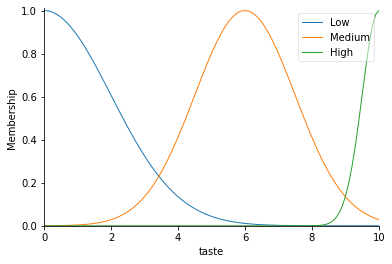

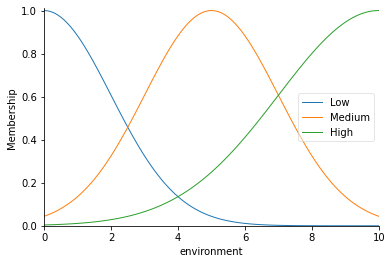

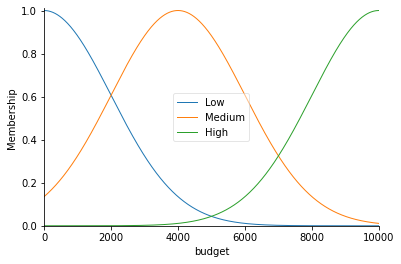

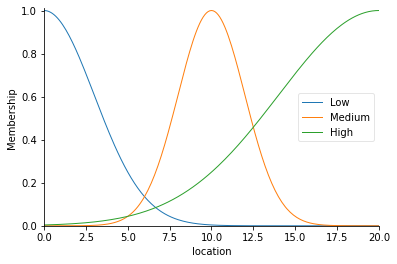

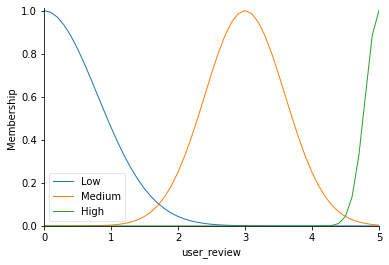

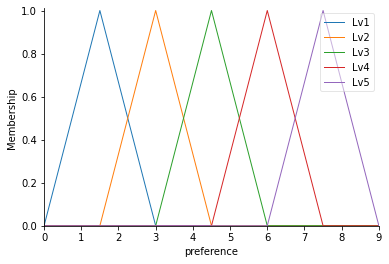

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
     
taste = ctrl.Antecedent(np.arange(0,10.1,0.1), 'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1), 'environment')
budget = ctrl.Antecedent(np.arange(0,10001,1), 'budget')
location = ctrl.Antecedent(np.arange(0,20.1,0.1), 'location')
user_review = ctrl.Antecedent(np.arange(0,5.1,0.1), 'user_review')
preference = ctrl.Consequent(np.arange(0,9.1,0.1), 'preference')
     


taste['Low']=fuzz.gaussmf(taste.universe,0,2)
taste['Medium']=fuzz.gaussmf(taste.universe,6,1.5)
taste['High']=fuzz.gaussmf(taste.universe,10,0.5)
taste.view()

environment['Low']=fuzz.gaussmf(environment.universe,0,2)
environment['Medium']=fuzz.gaussmf(environment.universe,5,2)
environment['High']=fuzz.gaussmf(environment.universe,10,3)
environment.view()

budget['Low']=fuzz.gaussmf(budget.universe,0,2000)
budget['Medium']=fuzz.gaussmf(budget.universe,4000,2000)
budget['High']=fuzz.gaussmf(budget.universe,10000,2000)
budget.view()

location['Low']=fuzz.gaussmf(location.universe,0,3)
location['Medium']=fuzz.gaussmf(location.universe,10,2)
location['High']=fuzz.gaussmf(location.universe,20,6)
location.view()

user_review['Low']=fuzz.gaussmf(user_review.universe,0,0.8)
user_review['Medium']=fuzz.gaussmf(user_review.universe,3,0.6)
user_review['High']=fuzz.gaussmf(user_review.universe,5,0.2)
user_review.view()

preference['Lv1'] = fuzz.trimf(preference.universe, [0,1.5,3])
preference['Lv2'] = fuzz.trimf(preference.universe, [1.5,3,4.5])
preference['Lv3'] = fuzz.trimf(preference.universe, [3,4.5,6])
preference['Lv4'] = fuzz.trimf(preference.universe, [4.5,6,7.5])
preference['Lv5'] = fuzz.trimf(preference.universe, [6,7.5,9])
preference.view()

2.72970374270226


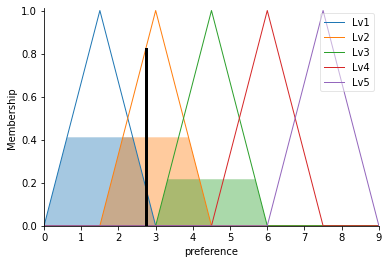

In [7]:
 

#Tạo list chứa các rule
rule = []

#Học các rule
index = ['Low', 'Medium', 'High']
level = ['Lv1','Lv2','Lv3','Lv4','Lv5']
lv=0
for a in range(3):
  for b in range(3):
    for c in range(3):
      for d in range(3):
        for e in range(3):
          if (a+b+c+d+e) <= 3:
            lv=0
          elif (a+b+c+d+e) <= 6:
            lv=1
          elif (a+b+c+d+e) <= 9:
            lv=2
          elif (a+b+c+d+e) <= 12:
            lv=3
          else:
            lv=4
          rule.append(ctrl.Rule( taste[index[a]] & environment[index[b]]  &  budget[index[c]]  &  location[index[d]]  &  user_review[index[d]], preference[level[lv]]))
#Học các rule
preference_control = ctrl.ControlSystem(rule[:])
     
#Simulation
preference_simulation = ctrl.ControlSystemSimulation(preference_control)
preference_simulation.input['taste'] = 8
preference_simulation.input['environment'] = 7
preference_simulation.input['budget'] = 500
preference_simulation.input['location'] = 10
preference_simulation.input['user_review'] = 3
preference_simulation.compute()
print(preference_simulation.output['preference'])
preference.view(sim=preference_simulation)